# Practical Session 2
### Kernel Methods for Machine Learning

Written by Yunlong Jiao / Romain Menegaux, 21 June 2022

In [1]:
# setup
import numpy as np

In [2]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
import sklearn
from sklearn import linear_model as lm
sklearn.__version__

'1.0.2'

***
## Tasks

1. Implement (naive) solvers to Ridge Regression, Weighted Ridge Regression and Logistic Ridge Regression (using Iteratively Reweighted Least Squares). See notes for the mathematical derivation.
2. Simulate some toy data to check if our solvers give correct solutions.

In [15]:
# Toy data
np.random.seed(42)
n = 100
p = 10
X = np.random.normal(0, 1, (n, p))
X = sklearn.preprocessing.scale(X)
beta_star = np.random.normal(0, 1, p)
y = X.dot(beta_star) + 0.2 * np.random.normal(0, 1, n)

def compare(beta1, beta2):
    print('''
Our solver:
{}
Scikit-learn:
{}

Difference between the two:
{}
        '''.format(beta1, beta2, np.sum((beta1-beta2)**2))
    )

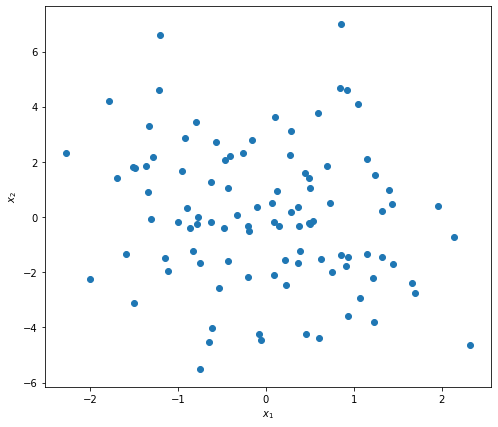

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,7))
plt.scatter(X[:, 3], y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

***
### Ridge Regression (RR)

Given $X \in \mathbb{R}^{n \times p}$ and $y \in \mathbb{R}^n$, solve
$$
\min_{\beta \in \mathbb{R}^p} \frac{1}{n} \|y - X \beta\|^2 + \lambda \|\beta\|^2 \,.
$$

In [5]:
# Ridge Regression (RR)
def solveRR(y, X, lam):
    n, p = X.shape
    assert (len(y) == n)
    
    # Hint:
    # beta = np.linalg.solve(A, b)
    # Finds solution to the linear system Ax = b
    return (beta)

**Try it out:**

In [ ]:
lam = 0.1

# Our solver
beta1 = solveRR(y, X, lam)

# Python solver
alpha = lam * X.shape[0]
model = lm.Ridge(alpha=alpha, fit_intercept=False, normalize=False)
beta2 = model.fit(X, y).coef_

# Check
compare(beta1, beta2)

In [28]:
import matplotlib.pyplot as plt

n = 100
X = np.random.rand(n)
beta_star = 0.8
y = X * beta_star + 0.1 * np.random.normal(0, 1, n)

lam = 0.1
beta_hat = solveRR(y, X[:, None], lam)

plt.figure(figsize=(8,7))
plt.scatter(X, y)
plt.plot(X, X * beta_hat)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

NameError: name 'beta' is not defined

In [22]:
X

array([], shape=(0, 1, 100), dtype=float64)

***
### Weighted Ridge Regression (WRR)

Given $X \in \mathbb{R}^{n \times p}$ and $y \in \mathbb{R}^n$, and weights $w \in \mathbb{R}^n_+$, solve
$$
\min_{\beta \in \mathbb{R}^p} \frac{1}{n} \sum_{i=1}^n w_i (y_i - \beta^\top x_i)^2 + \lambda \|\beta\|^2 \,.
$$

**Goal:** Express the objective as a regular Ridge Regression (RR)

In [ ]:
# Weighted Ridge Regression (WRR)
def solveWRR(y, X, w, lam):
    n, p = X.shape
    assert (len(y) == len(w) == n)

    # Hint:
    # Find y1 and X1 such that:
    # beta = solveRR(y1, X1, lam)
    return (beta)

**Try it out:**

In [ ]:
lam = 0.1
w = np.random.rand(len(y))

# Our solver
beta1 = solveWRR(y, X, w, lam)

# Python solver
alpha = lam * X.shape[0]
model = lm.Ridge(alpha=alpha, fit_intercept=False, normalize=False)
beta2 = model.fit(X, y, sample_weight=w).coef_

# Check
compare(beta1, beta2)

***
### Logistic Ridge Regression (LRR)

Given $X \in \mathbb{R}^{n \times p}$ and $y \in \{-1,+1\}^n$, solve
$$
\min_{\beta \in \mathbb{R}^p} \frac{1}{n} \sum_{i=1}^n \log (1+e^{-y_i \beta^\top x_i}) + \lambda \|\beta\|^2 \,.
$$

Let $\sigma(x) = \frac{1}{1 + e^{-x}}$ be the sigmoid function.

Compute $\sigma'(x)$

Rewriting $J$:
$$
J(\beta) = - \frac{1}{n} \sum_{i=1}^n {\log(\sigma(y_i\beta^\top x_i))} + \lambda \|\beta\|^2 \,.
$$

Compute its gradient $\nabla J$, and its Hessian $\nabla^2 J$
$$$$

#### Solving for optimal $\beta$ using Newton-Raphson
$$
\beta^{new} \leftarrow \beta^{old} - \left(\nabla^2 J(\beta^{old})\right)^{-1} \nabla J(\beta^{old})
$$

Show that each step is equivalent to solving a weighted ridge regression (WRR)


<font color='green'>Quadratic approximation to $J$</font>:

$$
J(\beta) \approx J_q(\beta) = J(\beta^{old}) + (\beta - \beta^{old})^\top \nabla J(\beta^{old}) + \frac{1}{2} (\beta - \beta^{old})^\top \nabla^2 J(\beta^{old}) (\beta - \beta^{old})
$$

**lemma**: $\min_\beta J_q(\beta) = \beta^{new}$

*proof*:

Next **show that $J_q$ is a WRR objective**

In [ ]:
# Logistic Ridge Regression (LRR)
def solveLRR(y, X, lam):
    n, p = X.shape
    assert (len(y) == n)
            
    # Hint: Use IRLS
    # for i in range(max_iter):
    #     ...
    #     beta = solveWRR(z, X, w, 2*lam)    
    return (beta)

**Try it out:**

In [ ]:
y_bin = np.sign(y) # Binarize targets
lam = 0.1

# Our solver
beta1 = solveLRR(y_bin, X, lam)

# Python solver
alpha = 2 * lam * X.shape[0]
model = lm.LogisticRegression(C=1/alpha, fit_intercept=False)
beta2 = model.fit(X, y_bin).coef_

# Check
compare(beta1, beta2)

***
### Mini Data Challenge

We will try to predict whether patients have breast cancer.

We use scikit-learn's [breast cancer dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)

30 features, 569 samples, 2 labels ('malignant' or 'benign')

In [6]:
# Load data and split into training / validation sets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# X, y = load_breast_cancer(return_X_y=True)
data = load_breast_cancer()
X, y = data['data'], data['target']
y = 2*y - 1 # transform from {0, 1} to {-1, 1}

# Hint: Scaling can be important
X = sklearn.preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X.shape

(569, 30)

In [ ]:
# Fit our model and compute its parameters
lam = 0.01
beta = solveLRR(y_train, X_train, lam)

In [ ]:
# Compute predicted probabilities and classes
# probas_pred = ?
# y_pred = ?

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Our model's performance:")
print('Accuracy: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('AUC: {:.2%}'.format(roc_auc_score(y_test, probas_pred)))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))